# NLP Assignment - Text Analysis of Corporate Layoff Statements
**Objective:** Analyze business-relevant textual corpus using NLP preprocessing and visualization techniques.

## Dataset Description

The dataset consists of official layoff announcements released by major technology companies including Meta, Amazon, Google, Microsoft, Spotify, Salesforce, and Uber.
The statements represent real-world corporate communication during organizational restructuring events and therefore provide a suitable business-relevant textual corpus for analysis.

The dataset contains more than 5000 words, satisfying the assignment requirement.

In [2]:
# Import libraries
import re
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

## Step 1 - Load Text Data

In [3]:
with open("tech_layoffs.txt", encoding="utf-8") as f:
    text = f.read()

print("Total characters in dataset:", len(text))

Total characters in dataset: 35216


## Step 2 - Basic Tokenization

For stability and reproducibility, regex-based tokenization is used instead of NLTK tokenizers.

In [4]:
# sentence approximation
sentences = text.split(".")

# word extraction
words_raw = re.findall(r'\b[a-zA-Z]+\b', text)

print("Number of sentences:", len(sentences))
print("Total raw words:", len(words_raw))

Number of sentences: 315
Total raw words: 6025


## Step 3 - Frequency Distribution (Before Preprocessing)

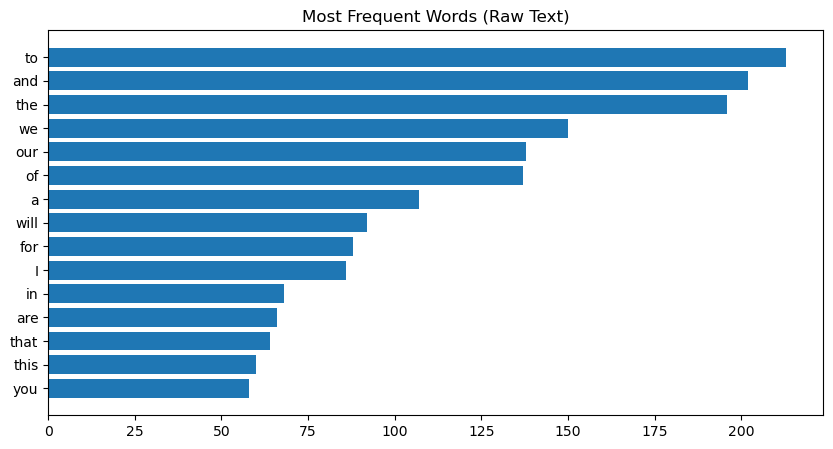

In [5]:
freq_raw = Counter(words_raw)

top_raw = freq_raw.most_common(15)
words = [w[0] for w in top_raw]
counts = [w[1] for w in top_raw]

plt.figure(figsize=(10,5))
plt.barh(words, counts)
plt.title("Most Frequent Words (Raw Text)")
plt.gca().invert_yaxis()
plt.show()

## Step 4 - Text Preprocessing

Cleaning steps applied:

- Lowercasing
- Removing punctuation
- Removing numbers
- Stopword removal
- Filtering short tokens

In [6]:
# lowercase
text_clean = text.lower()

# remove punctuation
text_clean = re.sub(r'[^a-z\s]', '', text_clean)

# tokenize
tokens = re.findall(r'\b[a-z]+\b', text_clean)

# remove stopwords
stop_words = set(stopwords.words("english"))
tokens = [w for w in tokens if w not in stop_words and len(w) > 2]

print("Words after preprocessing:", len(tokens))
print("Unique words:", len(set(tokens)))

Words after preprocessing: 2970
Unique words: 1250


## Step 5 - Frequency Distribution (After Preprocessing)

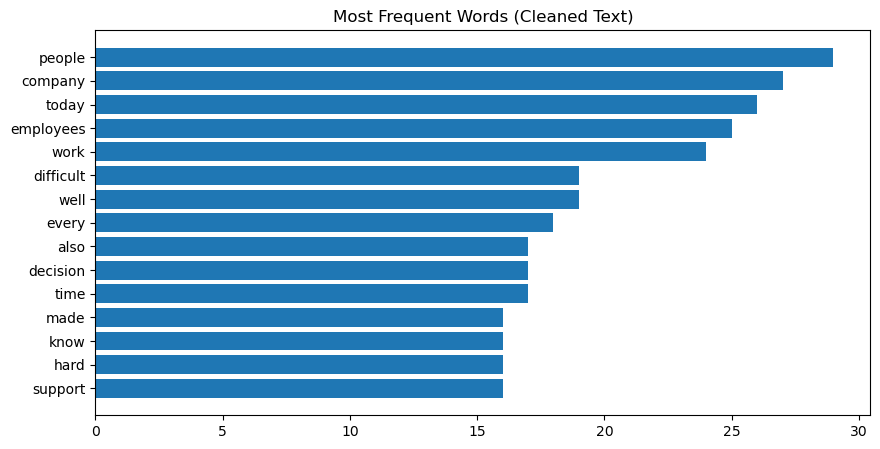

In [7]:
freq_clean = Counter(tokens)

top_clean = freq_clean.most_common(15)
words_clean = [w[0] for w in top_clean]
counts_clean = [w[1] for w in top_clean]

plt.figure(figsize=(10,5))
plt.barh(words_clean, counts_clean)
plt.title("Most Frequent Words (Cleaned Text)")
plt.gca().invert_yaxis()
plt.show()

## Step 6 - Word Cloud Visualization

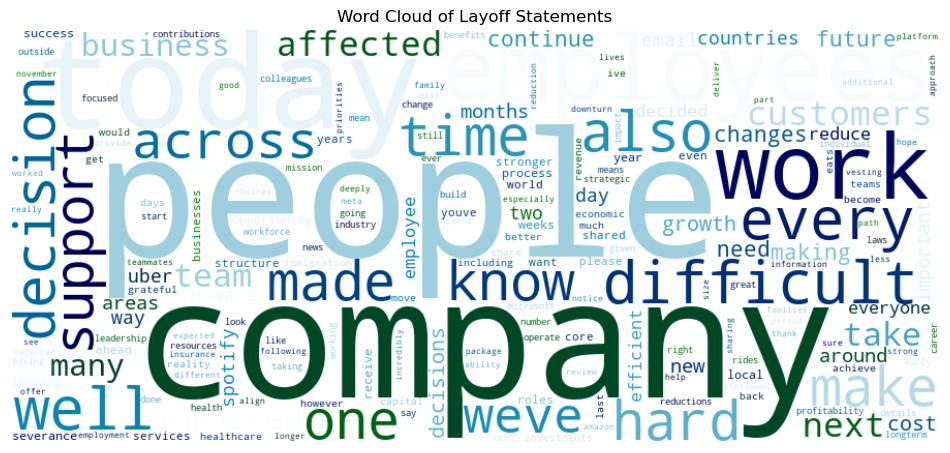

In [8]:
wordcloud = WordCloud(
    width=900,
    height=400,
    background_color="white",
    colormap="ocean"
).generate_from_frequencies(freq_clean)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of Layoff Statements")
plt.axis("off")
plt.show()

## Interpretation

The analysis shows that corporate layoff statements emphasize terms such as "people", "business", "decision", and "support". This suggests that organizations show layoffs as strategic business decisions while simultaneously attempting to convey empathy and reassurance. The dominance of neutral corporate language indicates that firms aim to maintain legitimacy and stakeholder confidence during periods of workforce reduction.